## 1) Librerias ##


**Sympy:**

Es una biblioteca de python que tiene caracteristicas de un sistema de álgebra coputacional.

https://docs.sympy.org/latest/tutorial/matrices.html

**Numpy:**

Es una biblioteca de python que da la opcion de trabajar con vectores y matrices y una gran cantidad de funciones matemáticas.

https://numpy.org/

**Matplotlib:**

Es una biblioteca de python que sirve para la generación de graficas a partir de datos.

https://matplotlib.org/

**Pandas:**

Es una biblioteca para manipulación y análisis de datos para el lenguaje de programación Python. En particular, ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales. 

https://pandas.pydata.org/

**Seaborn:**

Es una biblioteca de visualización de datos de Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos.

https://seaborn.pydata.org/


**Math:**

Es un módulo que proporciona acceso a las funciones matemáticas definidas por el estándar de C.

https://docs.python.org/3/library/math.html

In [1]:
import numpy as np
from sympy import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as mt
from numpy import random

## 2) Fundamentos de python 


In [2]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/chPhlsHoEPo?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

C:\Users\User\anaconda3\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [3]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/S_f2qV2_U00?rel=0&amp; allowfullscreen></iframe>')

## 3) Subir archivos

In [4]:
datos=pd.DataFrame({'X':[1.3,1.3,1.4,1.5,1.7,1.7,1.8,1.8,1.9,2.1,2.2,2.3,2.4,2.5,2.7,2.8,2.8,2.8,2.9,3.1,3.3,3.6,3.7,3.8,3.9,4.1,4.3,4.7,4.9,5.1,5.7,5.8,6.1,6.2,6.3]})
datos

,X
0,1.3
1,1.3
2,1.4
3,1.5
4,1.7
5,1.7
6,1.8
7,1.8
8,1.9
9,2.1


In [5]:
X=datos['X']
N=len(X) # Numero de datos
L=X.min() # Minimo valor
U=X.max() # Maximo valor
um=0.1 # Unidad de medida
print(f'N={N}, L={L}, U={U} y um={um}')

N=35, L=1.3, U=6.3 y um=0.1


## 4) Regla de Sturges

El número de clases $c$ esta dado por

$$c=1+\frac{ln(N)}{ln(2)} $$

In [6]:
# Entrada: Número de datos N
# Salida: Número sugerido de clases
def Sturges(N):
    c=1+mt.log(N)/mt.log(2)
    return int(np.round(c))

In [7]:
c=Sturges(N)
c

6

## 5) Tablas de frecuencia para datos agrupados

In [8]:
datos['Clases']=pd.cut(datos['X'], bins=c,precision=1) # Clasifica los datos en clases
datos

,X,Clases
0,1.3,"(1.3, 2.1]"
1,1.3,"(1.3, 2.1]"
2,1.4,"(1.3, 2.1]"
3,1.5,"(1.3, 2.1]"
4,1.7,"(1.3, 2.1]"
5,1.7,"(1.3, 2.1]"
6,1.8,"(1.3, 2.1]"
7,1.8,"(1.3, 2.1]"
8,1.9,"(1.3, 2.1]"
9,2.1,"(1.3, 2.1]"


In [9]:
datos['Clases']=pd.cut(datos['X'], bins=c,precision=2)
TF=(datos.groupby("Clases").agg(Frecuencia_absoluta=("X", "count"))) #Frecuencias absolutas 
TF['Frecuencia_relativa']=TF['Frecuencia_absoluta']/sum(TF['Frecuencia_absoluta']) #Frecuencia relativa
TF['Frecuencia_acumulada']=TF['Frecuencia_absoluta'].cumsum() #Frecuencia acumulada
TF['Frecuencia_relativa_acumulada']=TF['Frecuencia_relativa'].cumsum() #Frecuencia relativa acumulada
TF


,Frecuencia_absoluta,Frecuencia_relativa,Frecuencia_acumulada,Frecuencia_relativa_acumulada
Clases,,,,
"(1.3, 2.13]",10,0.285714,10,0.285714
"(2.13, 2.97]",9,0.257143,19,0.542857
"(2.97, 3.8]",5,0.142857,24,0.685714
"(3.8, 4.63]",3,0.085714,27,0.771429
"(4.63, 5.47]",3,0.085714,30,0.857143
"(5.47, 6.3]",5,0.142857,35,1.000000


## 6) Marcas de clase 

In [10]:
X=np.array(datos['X'])

I = X.min()
S = X.max()

intervalos = pd.interval_range(start=I,end=S,periods=c,name="Intervalo",closed="left")

df = pd.DataFrame(index=intervalos)
Marcas=df.index.mid
TF['Marca_de_clase']  = Marcas
TF

,Frecuencia_absoluta,Frecuencia_relativa,Frecuencia_acumulada,Frecuencia_relativa_acumulada,Marca_de_clase
Clases,,,,,
"(1.3, 2.13]",10,0.285714,10,0.285714,1.716667
"(2.13, 2.97]",9,0.257143,19,0.542857,2.550000
"(2.97, 3.8]",5,0.142857,24,0.685714,3.383333
"(3.8, 4.63]",3,0.085714,27,0.771429,4.216667
"(4.63, 5.47]",3,0.085714,30,0.857143,5.050000
"(5.47, 6.3]",5,0.142857,35,1.000000,5.883333


## 7) Histograma 

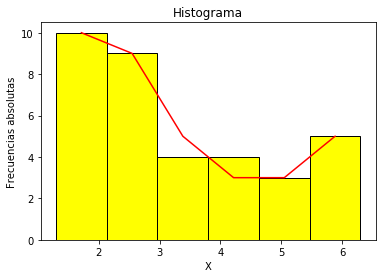

In [11]:
plt.hist(datos['X'],bins=c,cumulative=False,density=False,color='yellow',edgecolor ='black')
plt.xlabel('X')
plt.ylabel('Frecuencias absolutas')
plt.title('Histograma')
#plt.grid(True,color='gray')
plt.plot(TF['Marca_de_clase'] ,TF['Frecuencia_absoluta'] ,color='red')
plt.show()

## 8) Tablas de frecuencia datos no agrupados

In [12]:
iris = pd.read_csv("https://raw.githubusercontent.com/toneloy/data/master/iris.csv")
N=len(iris)
N
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [13]:
TF_iris=(iris.groupby("species").agg(Frecuencia_absoluta=("species", "count")))
TF_iris['Frecuencia_relativa']=TF_iris['Frecuencia_absoluta']/sum(TF_iris['Frecuencia_absoluta'])
TF_iris['Frecuencia_acumulada']=TF_iris['Frecuencia_absoluta'].cumsum()
TF_iris['Frecuencia_relativa_acumulada']=TF_iris['Frecuencia_relativa'].cumsum()
TF_iris

,Frecuencia_absoluta,Frecuencia_relativa,Frecuencia_acumulada,Frecuencia_relativa_acumulada
species,,,,
setosa,50,0.333333,50,0.333333
versicolor,50,0.333333,100,0.666667
virginica,50,0.333333,150,1.000000


## 9) Obtener el codigo latex de las tablas

In [14]:
Tabla_df=pd.DataFrame(TF_iris)
print( Tabla_df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Frecuencia\_absoluta &  Frecuencia\_relativa &  Frecuencia\_acumulada &  Frecuencia\_relativa\_acumulada \\
species    &                      &                      &                       &                                \\
\midrule
setosa     &                   50 &             0.333333 &                    50 &                       0.333333 \\
versicolor &                   50 &             0.333333 &                   100 &                       0.666667 \\
virginica  &                   50 &             0.333333 &                   150 &                       1.000000 \\
\bottomrule
\end{tabular}



## 10) Graficas para frecuencias acumuladas y acumuladas relativas 

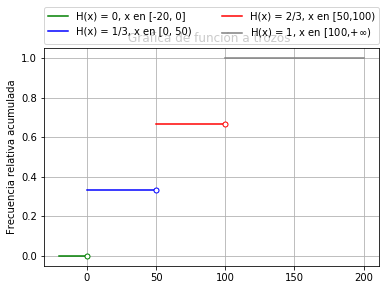

In [15]:
import numpy as np
import matplotlib.pyplot as plt
 
x1 = np.linspace(-20, 0, num=3)
x2 = np.linspace(0, 50, num=2)
x3 = np.linspace(50, 100, num=3)
x4 = np.linspace(100, 200, num=3)
 
plt.plot(x1, [0 for x in x1], 'g',  label='H(x) = 0, x en [-20, 0]')
plt.plot(x2, [1/3 for x in x2], 'b', label='H(x) = 1/3, x en [0, 50)')
plt.plot(x3, [2/3 for x in x3], 'r', label='H(x) = 2/3, x en [50,100)')
plt.plot(x4, [1 for x in x4], 'gray', label='H(x) = 1, x en [100,$+\infty$)')
plt.plot(0, 0, 'go', markersize=5, fillstyle='none', markerfacecolor='w')
plt.plot(50, 1/3, 'bo', markersize=5, fillstyle='none', markerfacecolor='w')
plt.plot(100, 2/3, 'ro', markersize=5, fillstyle='none', markerfacecolor='w')
 
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel('Frecuencia relativa acumulada') 
plt.title('Grafica de función a trozos ')
plt.grid()
plt.show()

## 11) Diagrama de barras para frecuencias absolutas y frecuencias relativas - Datos no agrupados

In [16]:
TF_iris['Frecuencia_absoluta'].index

Index(['setosa', 'versicolor', 'virginica'], dtype='object', name='species')

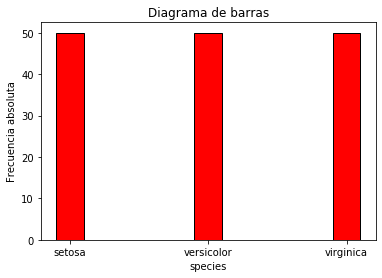

In [17]:
plt.bar( TF_iris['Frecuencia_absoluta'].index , TF_iris['Frecuencia_absoluta'],align='center',width=0.2,color='red',edgecolor ='black')
plt.title('Diagrama de barras')
plt.xlabel('species')
plt.ylabel('Frecuencia absoluta')
#plt.grid(True,color='gray')
plt.show()

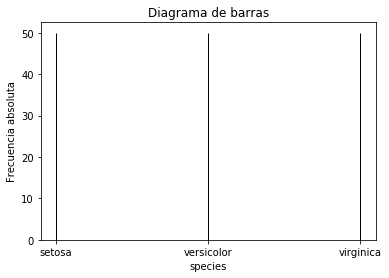

In [18]:
plt.bar( TF_iris['Frecuencia_absoluta'].index , TF_iris['Frecuencia_absoluta'],align='center',width=0.0,color='red',edgecolor ='black')
plt.title('Diagrama de barras')
plt.xlabel('species')
plt.ylabel('Frecuencia absoluta')
#plt.grid(True,color='gray')
plt.show()

## 12) Diagramas de torta para frecuencias relativas - Datos no agrupados

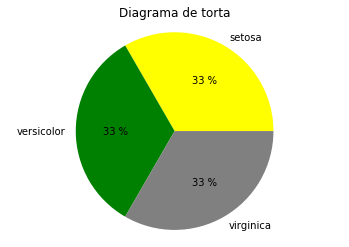

In [19]:
colores=['yellow','green','gray']
plt.pie(TF_iris['Frecuencia_relativa'],labels=TF_iris['Frecuencia_relativa'].index,autopct="%0.0f %%",colors=colores)
plt.title('Diagrama de torta')
plt.axis('equal')
plt.show()

## 13) Tablas de contingencia 

In [20]:


datos = [["Hombre", "Millonarios"],
         ["Mujer","Santa Fe"],
         ["Hombre", "Santa Fe"],
         ["Mujer", "Santa Fe"],
         ["Mujer", "Tolima"],
         ["Hombre", "Nacional"],
         ["Mujer", "Millonarios"],
         ["Mujer", "Millonarios"]]
import pandas as pd
df = pd.DataFrame(datos, columns=["Genero", "Equipo_de_futbol"])
df

,Genero,Equipo_de_futbol
0,Hombre,Millonarios
1,Mujer,Santa Fe
2,Hombre,Santa Fe
3,Mujer,Santa Fe
4,Mujer,Tolima
5,Hombre,Nacional
6,Mujer,Millonarios
7,Mujer,Millonarios


In [21]:
pd.crosstab(df.Genero, df.Equipo_de_futbol,margins=True)


Equipo_de_futbol,Millonarios,Nacional,Santa Fe,Tolima,All
Genero,,,,,
Hombre,1,1,1,0,3
Mujer,2,0,2,1,5
All,3,1,3,1,8


## 14) Manejo de Data Frame

In [22]:
titanic = sns.load_dataset('titanic') # Cargar los datos desde la libreria
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [23]:
titanic.columns # Nombre de las variables del Data Frame 

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [24]:
titanic.dtypes # Tipos de datos en el Data Frame

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [25]:
titanic.describe() # Resumen de las variables

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
titanic.pivot_table('survived', 'class')

,survived
class,
First,0.629630
Second,0.472826
Third,0.242363


In [27]:
titanic.pivot_table('survived', 'class', aggfunc=np.sum,margins=True)

,survived
class,
First,136
Second,87
Third,119
All,342


In [28]:
titanic.pivot_table('survived', 'sex', 'class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## 15) Medidas de tendencia central, de dispersión y de colocación

In [29]:
X = random.normal(loc=152,scale=3,size=1000)
X

array([158.38377527, 146.88620075, 153.96802783, 152.28425341,
       151.69184499, 152.46958188, 152.0131796 , 153.97717929,
       145.44571107, 152.99461486, 153.31102713, 155.76531575,
       151.31085029, 151.71717958, 154.39184175, 153.22418934,
       151.83502638, 148.5895565 , 156.12525322, 150.16140475,
       151.13244471, 156.387882  , 157.37036716, 155.89722803,
       154.33536095, 150.8708737 , 153.02972633, 154.82754449,
       155.75906655, 146.370834  , 152.80014894, 145.75859513,
       151.73775992, 145.60418733, 153.96044209, 147.00171011,
       145.7917963 , 151.73811212, 152.15510226, 145.24141931,
       152.02944135, 147.34468706, 150.56650806, 149.85891185,
       152.3923961 , 152.24186366, 155.07190849, 149.45458342,
       152.45531984, 151.51531836, 152.63230117, 154.89228326,
       148.59572342, 150.34448975, 154.95627255, 151.89794684,
       144.96555422, 155.43671037, 157.08130129, 151.5712921 ,
       152.33629936, 149.97225521, 154.36287165, 153.42

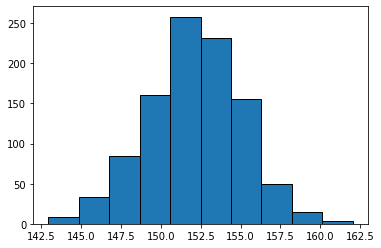

In [30]:
plt.hist(X,edgecolor ='black')
plt.show()

In [31]:
media=np.mean(X)
media

152.09051353019098

In [32]:
mediana=np.median(X)
mediana

152.2218378660182

In [33]:
varianza=np.var(X)
varianza

8.776129324655491

In [34]:
desviacion_estandar=np.std(X)
desviacion_estandar

2.9624532611765355

In [35]:
percentil_75=np.percentile(X, 75)
percentil_75

154.09815402045993

In [36]:
percentil_25=np.percentile(X, 25)
percentil_25

150.19386659355965

## 16) Diagrama de caja y bigotes

In [37]:
X = random.normal(loc=152,scale=3,size=1000)


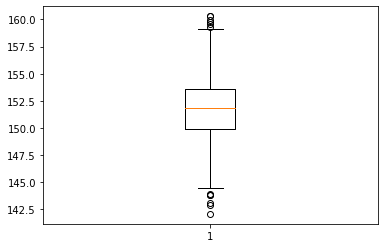

In [38]:
plt.boxplot(X) # Con matplotlib
plt.show()

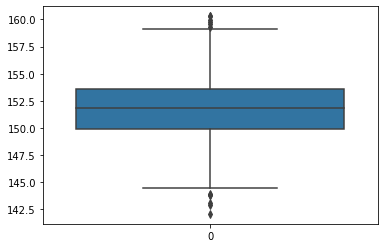

In [39]:
sns.boxplot(data=X) # Con seaborn
plt.show()

## 17) Covarianza y correlación

In [40]:
x=np.array([1.70,1.72,1.68,1.80,1.55,1.60,1.62,1.59,1.83,1.81,1.72,1.71,1.69,1.63,1.70,1.70,1.71,1.69,1.72,1.70])
y=np.array([71,73,67,79,57,61,62,58,81,82,71,71,70,64,69,68,70,70,73,74])
datos=pd.DataFrame({'x':x,'y':y})
datos


,x,y
0,1.70,71
1,1.72,73
2,1.68,67
3,1.80,79
4,1.55,57
5,1.60,61
6,1.62,62
7,1.59,58
8,1.83,81
9,1.81,82


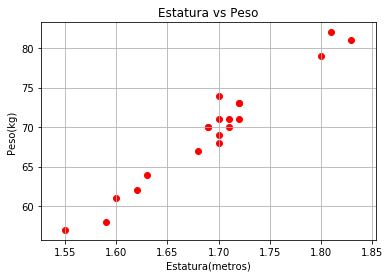

In [41]:
plt.scatter(x,y,color='red')
plt.grid()
plt.xlabel('Estatura(metros)')
plt.ylabel('Peso(kg)')
plt.title('Estatura vs Peso')
plt.show()

In [42]:
media_x=np.array(x).mean()
media_x

1.6935000000000007

In [43]:
media_y=np.array(y).mean()
media_y

69.55

In [44]:
SSxy=np.sum((x-media_x)*(y-media_y))
SSxy

9.031499999999998

In [45]:
n=len(x)
n

20

In [46]:
covarianza_xy=SSxy/(n-1)
covarianza_xy

0.4753421052631578

In [47]:
SSx=np.sum((x-media_x)*(x-media_x))
print(SSx)
SSy=np.sum((y-media_y)*(y-media_y))
print(SSy)

0.09605499999999999
886.9500000000002


In [48]:
r=SSxy/mt.sqrt(SSx*SSy)
r


0.9784763408604267

In [49]:
Matriz_covarianzas=np.cov(x,y)
Matriz_covarianzas

array([[5.05552632e-03, 4.75342105e-01],
       [4.75342105e-01, 4.66815789e+01]])

In [50]:
Matriz_correlacion=np.corrcoef(x,y)
Matriz_correlacion

array([[1.        , 0.97847634],
       [0.97847634, 1.        ]])

## 18) Regresión lineal simple

In [51]:
# Entrada: Vectores x y y
# Salida: m, b y SSE
def Regresion_lineal_simple(x,y):
    n=np.size(x)
    media_x=np.array(x).mean()
    media_y=np.array(y).mean()
    SSxy=np.sum((x-media_x)*(y-media_y))
    SSx=np.sum((x-media_x)*(x-media_x))
    SSy=np.sum((y-media_y)*(y-media_y))
    m=SSxy/SSx
    b=media_y-m*media_x
    SSE=SSy-m*SSxy
    return m, b, SSE

In [52]:
m,b,SSE=Regresion_lineal_simple(x,y)
print(f'm={m}, b={b} y SSE={SSE}')

m=94.02425693613033, b=-89.68007912133679 y SSE=37.76992348133933


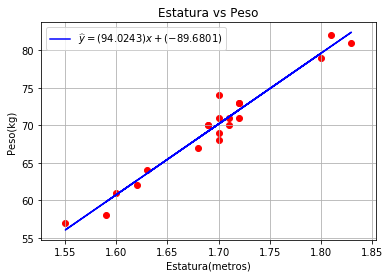

In [53]:
%matplotlib inline

m,b,SSE=Regresion_lineal_simple(x,y)
plt.scatter(x,y,color='red')
y_gorro=m*x+b
plt.plot(x,y_gorro,color='b',label='$\widehat{y}='f'({m.round(4)})''x+'f'({b.round(4)})''$')
plt.grid()
plt.xlabel('Estatura(metros)')
plt.ylabel('Peso(kg)')
plt.title('Estatura vs Peso')
plt.legend()
plt.show()

In [54]:
# Entrada: Valor x que se quiere predecir, pendiemte m e intercepto b de la recta de regresión lineal
# Salida: Predicción
def modelo(x,m,b):
    y_gorro=m*x+b
    return y_gorro

In [55]:
x0=1.64
print(f' Si una persona mide {x0} metros, entonces se predice que esa persona pesará {modelo(x0,m,b).round(2)} kg')

 Si una persona mide 1.64 metros, entonces se predice que esa persona pesará 64.52 kg


## 19) Forma matricial de los minimos cuadrados

Se debe encontrar el polinomio de regresión simple de grado $m$

$$\widehat{y}=a_{0}+a_{1}x+a_{2}x^{2}+\cdots + a_{m}x^{m} $$

In [56]:
A=Matrix([x.tolist(),np.ones(20).tolist()])
A=A.T
A

Matrix([
[ 1.7, 1.0],
[1.72, 1.0],
[1.68, 1.0],
[ 1.8, 1.0],
[1.55, 1.0],
[ 1.6, 1.0],
[1.62, 1.0],
[1.59, 1.0],
[1.83, 1.0],
[1.81, 1.0],
[1.72, 1.0],
[1.71, 1.0],
[1.69, 1.0],
[1.63, 1.0],
[ 1.7, 1.0],
[ 1.7, 1.0],
[1.71, 1.0],
[1.69, 1.0],
[1.72, 1.0],
[ 1.7, 1.0]])

In [57]:
c=Matrix(y.tolist())
c

Matrix([
[71],
[73],
[67],
[79],
[57],
[61],
[62],
[58],
[81],
[82],
[71],
[71],
[70],
[64],
[69],
[68],
[70],
[70],
[73],
[74]])

In [58]:
M=A.T*A
M


Matrix([
[57.4549, 33.87],
[  33.87,  20.0]])

In [59]:
A.T*c

Matrix([
[2364.69],
[ 1391.0]])

In [60]:
nc=int(M.shape[1])
D=M.col_insert(nc,A.T*c)
D

Matrix([
[57.4549, 33.87, 2364.69],
[  33.87,  20.0,  1391.0]])

In [61]:
u=D.rref()[0][:,nc]
u

Matrix([
[ 94.0242569361479],
[-89.6800791213665]])

$$a_{1}= m=94.0242569361309 $$

$$a_{0}=b= -89.6800791213377$$

In [62]:
x2=x**2
x2

array([2.89  , 2.9584, 2.8224, 3.24  , 2.4025, 2.56  , 2.6244, 2.5281,
       3.3489, 3.2761, 2.9584, 2.9241, 2.8561, 2.6569, 2.89  , 2.89  ,
       2.9241, 2.8561, 2.9584, 2.89  ])

In [63]:
A=Matrix([x2.tolist(),x.tolist(),np.ones(20).tolist()])
A=A.T
A

Matrix([
[  2.89,  1.7, 1.0],
[2.9584, 1.72, 1.0],
[2.8224, 1.68, 1.0],
[  3.24,  1.8, 1.0],
[2.4025, 1.55, 1.0],
[  2.56,  1.6, 1.0],
[2.6244, 1.62, 1.0],
[2.5281, 1.59, 1.0],
[3.3489, 1.83, 1.0],
[3.2761, 1.81, 1.0],
[2.9584, 1.72, 1.0],
[2.9241, 1.71, 1.0],
[2.8561, 1.69, 1.0],
[2.6569, 1.63, 1.0],
[  2.89,  1.7, 1.0],
[  2.89,  1.7, 1.0],
[2.9241, 1.71, 1.0],
[2.8561, 1.69, 1.0],
[2.9584, 1.72, 1.0],
[  2.89,  1.7, 1.0]])

In [64]:
M=A.T*A
M

Matrix([
[166.15512073, 97.625073, 57.4549],
[   97.625073,   57.4549,   33.87],
[     57.4549,     33.87,    20.0]])

In [65]:
A.T*c

Matrix([
[4026.5535],
[  2364.69],
[   1391.0]])

In [66]:
nc=int(M.shape[1])
D=M.col_insert(nc,A.T*c)
D

Matrix([
[166.15512073, 97.625073, 57.4549, 4026.5535],
[   97.625073,   57.4549,   33.87,   2364.69],
[     57.4549,     33.87,    20.0,    1391.0]])

In [67]:
u=D.rref()[0][:,nc]
u

Matrix([
[-13.3236761135616],
[ 139.132345776678],
[-127.795103635952]])

In [68]:
a2=u[0]
a1=u[1]
a0=u[2]

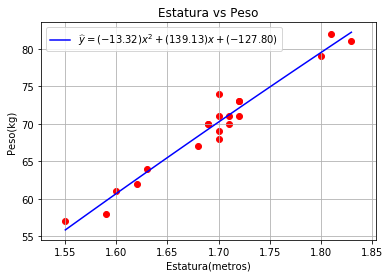

In [69]:
plt.scatter(x,y,color='red')
xg=np.linspace(np.min(x),np.max(x),100)
y_gorro=a2*xg**2+a1*xg+a0
plt.plot(xg,y_gorro,color='b',label='$\widehat{y}='f'({a2.round(2)})''x^{2}+'f'({a1.round(2)})''x+'f'({a0.round(2)})''$')
plt.xlabel('Estatura(metros)')
plt.ylabel('Peso(kg)')
plt.title('Estatura vs Peso')
plt.legend()
plt.grid()
plt.show()

In [70]:
# Entrada: Arrays x, y y un entero m que es el grado del polinomio de regresión.
# Salida un vector con los coeficientes del polinomio de regresión.
def Regresion_polinomica(x,y,m):
    A=Matrix([])
    i=0
    while i<m+1:
        xm=x**(m-i)
        A=A.col_insert(i,Matrix(xm.tolist()))
        i+=1
    c=Matrix(y)
    M=A.T*A
    nc=int(M.shape[1])
    D=M.col_insert(nc,A.T*c)
    u=D.rref()[0][:,nc]
    return u

In [71]:
m=4
u=Regresion_polinomica(x,y,m)
u

Matrix([
[-479.509605169101],
[ 2373.84365731403],
[-3811.94154333966],
[ 1908.60558185827],
[ 184.378256154167]])

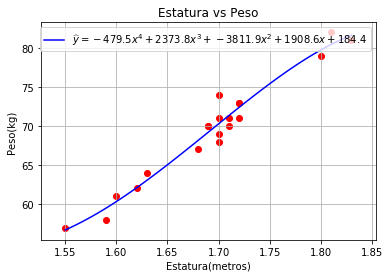

In [72]:
plt.scatter(x,y,color='red')
xg=np.linspace(np.min(x),np.max(x),100)
y_gorro=u[0]*xg**4+u[1]*xg**3+u[2]*xg**2+u[3]*xg**1+u[4]
plt.plot(xg,y_gorro,color='b',label='$\widehat{y}='f'{u[0].round(1)}''x^{4}+'f'{u[1].round(1)}''x^{3}+'f'{u[2].round(1)}''x^{2}+'f'{u[3].round(1)}''x +'f'{u[4].round(1)}''$')
plt.xlabel('Estatura(metros)')
plt.ylabel('Peso(kg)')
plt.title('Estatura vs Peso')
plt.legend()
plt.grid()
plt.show()

## 20) Modelo de regresión lineal simple usando la libreria sklearn

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [74]:
x=datos.iloc[:,:-1].values
x

array([[1.7 ],
       [1.72],
       [1.68],
       [1.8 ],
       [1.55],
       [1.6 ],
       [1.62],
       [1.59],
       [1.83],
       [1.81],
       [1.72],
       [1.71],
       [1.69],
       [1.63],
       [1.7 ],
       [1.7 ],
       [1.71],
       [1.69],
       [1.72],
       [1.7 ]])

In [75]:
regresion=LinearRegression()
regresion.fit(x,y)
print(regresion.coef_)
print(regresion.intercept_)
print(regresion.singular_)

[94.02425694]
-89.68007912133676
[0.30992741]
